# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

### Carragando os pacotes:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carragando os dados:

In [4]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                 object
posse_de_imovel                  object
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
ano                               int32
dtype: object


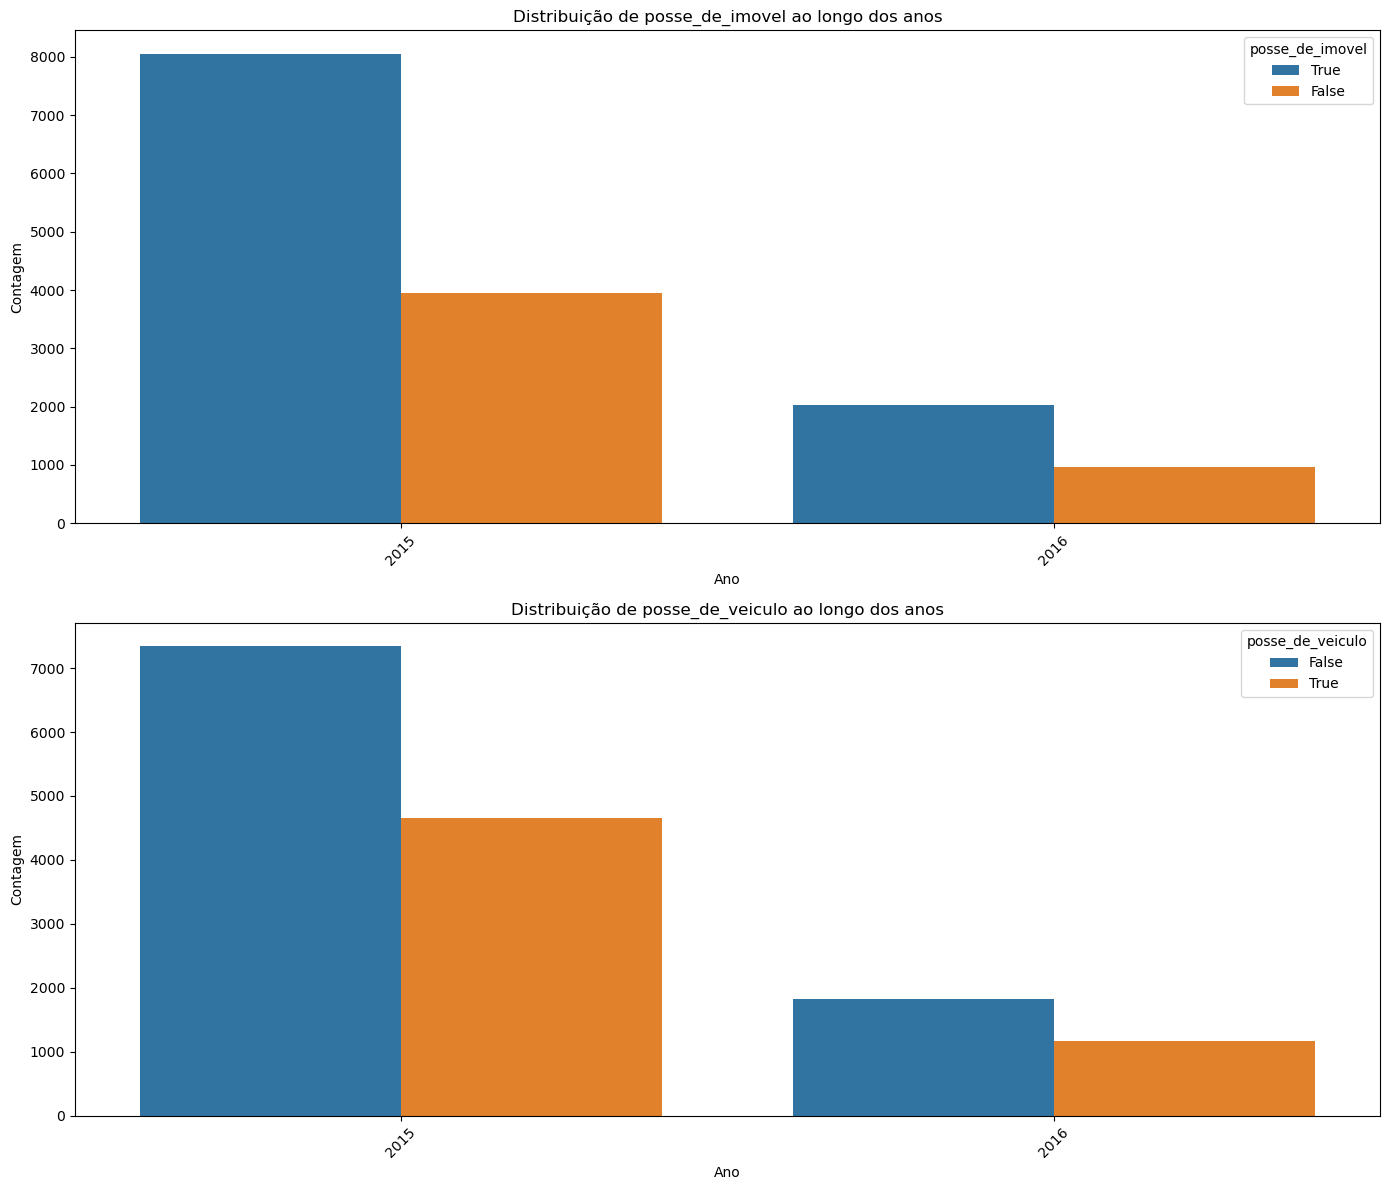

In [19]:
# Substituir valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Verificar os tipos de dados
print(df.dtypes)

# Converter a variável 'data_ref' para datetime se necessário
df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')

# Extrair o ano da variável 'data_ref'
df['ano'] = df['data_ref'].dt.year

# Converter variáveis booleanas para strings
df['posse_de_imovel'] = df['posse_de_imovel'].astype(str)
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(str)

# Variáveis booleanas (como strings)
variaveis_booleanas = ['posse_de_imovel', 'posse_de_veiculo']

# Configurar o tamanho da figura
plt.figure(figsize=(14, 6 * len(variaveis_booleanas)))

# Loop para criar gráficos de barras para cada variável booleana
for i, var in enumerate(variaveis_booleanas):
    plt.subplot(len(variaveis_booleanas), 1, i + 1)
    sns.countplot(data=df, x='ano', hue=var)
    plt.title(f'Distribuição de {var} ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Contagem')
    plt.legend(title=var, loc='upper right')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Análise:

Podemos verificar aqui que houveram alterações tanto na posse de veículos quanto na posse de imóveis: no ano de 2016 houveram quedas, o que pode ser um alerta para a reavalização de créditos e de futuras inadimplências.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Todos os valores infinitos foram substituídos por NaN.


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

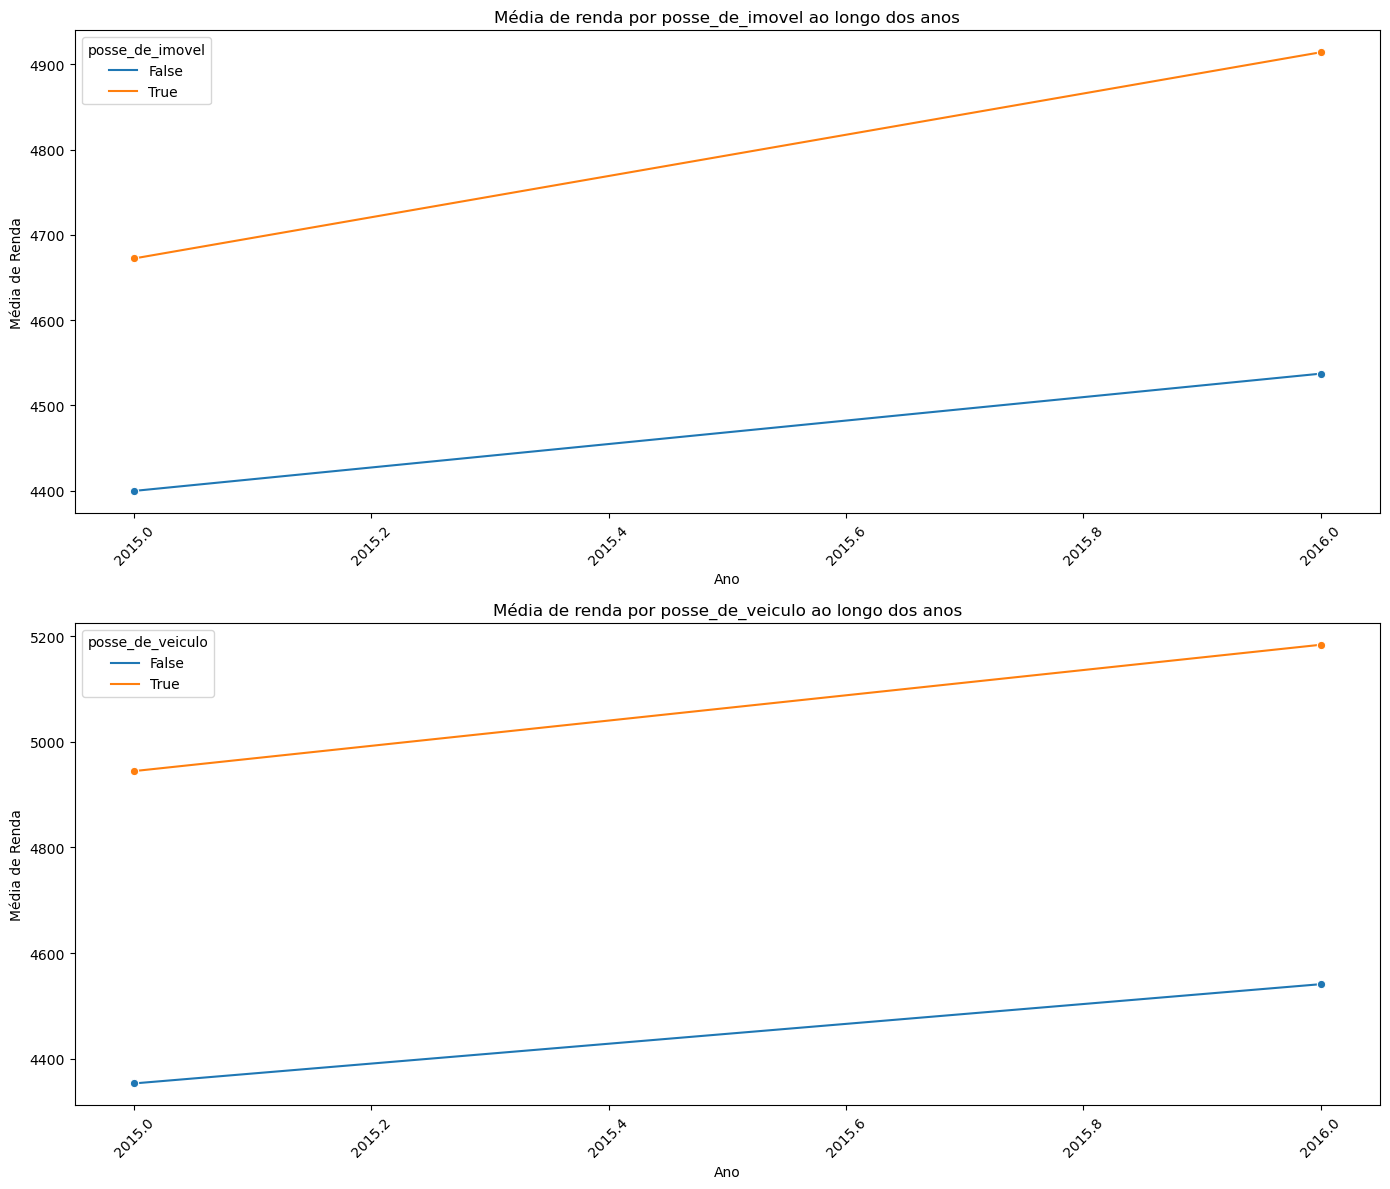

In [30]:
# Substituir valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Verificar se ainda há valores infinitos
if df.isin([np.inf, -np.inf]).any().any():
    print("Ainda existem valores infinitos no DataFrame.")
else:
    print("Todos os valores infinitos foram substituídos por NaN.")

# Converter a variável 'data_ref' para datetime se necessário
df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')

# Extrair o ano da variável 'data_ref'
df['ano'] = df['data_ref'].dt.year

# Converter variáveis booleanas para strings
df['posse_de_imovel'] = df['posse_de_imovel'].astype(str)
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(str)

# Variáveis qualitativas
variaveis_qualitativas = ['posse_de_imovel', 'posse_de_veiculo']

# Verificar se a variável 'renda' está presente
if 'renda' not in df.columns:
    raise ValueError("'renda' não encontrada no DataFrame. Verifique as colunas disponíveis.")

# Configurar o tamanho da figura
plt.figure(figsize=(14, 6 * len(variaveis_qualitativas)))

# Loop para criar gráficos de linhas para cada variável qualitativa
for i, var in enumerate(variaveis_qualitativas):
    plt.subplot(len(variaveis_qualitativas), 1, i + 1)
    
    # Calcular a média de 'renda' para cada combinação de ano e nível da variável qualitativa
    media_por_ano = df.groupby(['ano', var])['renda'].mean().reset_index()
    
    # Plotar as médias
    sns.lineplot(data=media_por_ano, x='ano', y='renda', hue=var, marker='o')
    plt.title(f'Média de renda por {var} ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Média de Renda')
    plt.legend(title=var)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Todos os valores infinitos foram substituídos por NaN.


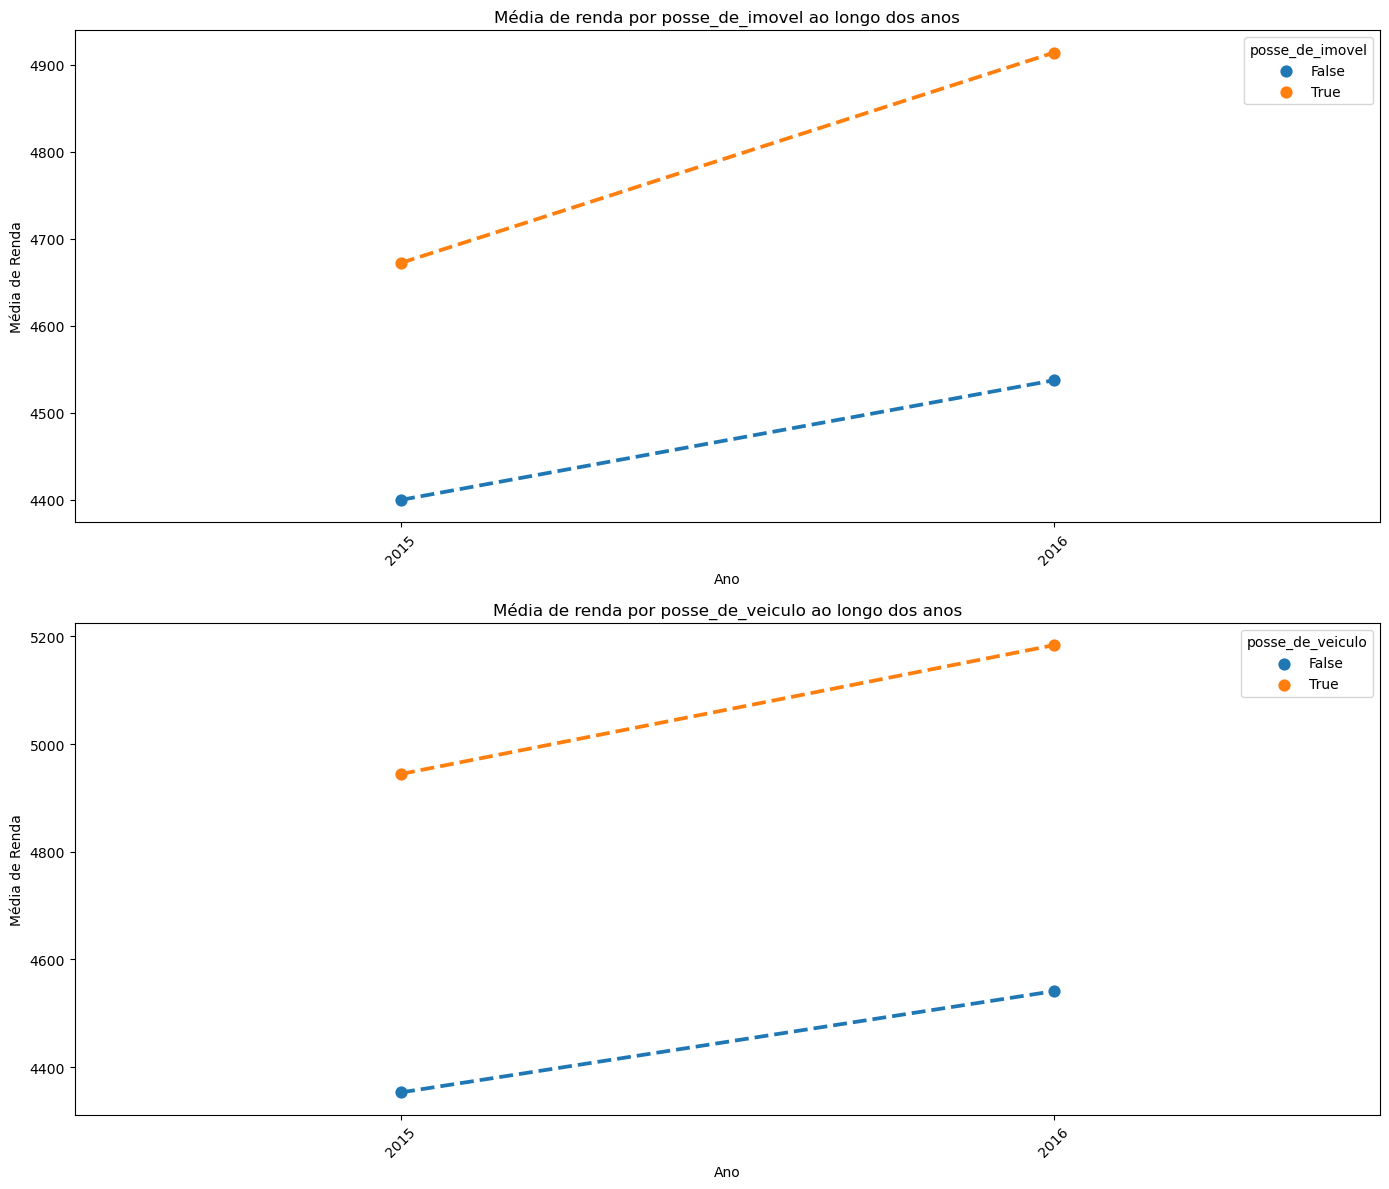

In [33]:
# Substituir valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Verificar se ainda há valores infinitos
if df.isin([np.inf, -np.inf]).any().any():
    print("Ainda existem valores infinitos no DataFrame.")
else:
    print("Todos os valores infinitos foram substituídos por NaN.")

# Converter a variável 'data_ref' para datetime se necessário
df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')

# Extrair o ano da variável 'data_ref'
df['ano'] = df['data_ref'].dt.year

# Converter variáveis booleanas para strings
df['posse_de_imovel'] = df['posse_de_imovel'].astype(str)
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(str)

# Variáveis qualitativas
variaveis_qualitativas = ['posse_de_imovel', 'posse_de_veiculo']

# Verificar se a variável 'renda' está presente
if 'renda' not in df.columns:
    raise ValueError("'renda' não encontrada no DataFrame. Verifique as colunas disponíveis.")

# Configurar o tamanho da figura
plt.figure(figsize=(14, 6 * len(variaveis_qualitativas)))

# Loop para criar gráficos de pointplot para cada variável qualitativa
for i, var in enumerate(variaveis_qualitativas):
    plt.subplot(len(variaveis_qualitativas), 1, i + 1)
    
    # Calcular a média de 'renda' para cada combinação de ano e nível da variável qualitativa
    media_por_ano = df.groupby(['ano', var])['renda'].mean().reset_index()
    
    # Plotar as médias com intervalo de confiança
    sns.pointplot(data=media_por_ano, x='ano', y='renda', hue=var, markers='o', linestyles='--')
    plt.title(f'Média de renda por {var} ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Média de Renda')
    plt.legend(title=var, loc='upper right')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Análise:

Analisando e comparando os gráficos de perfis médios no tempo vemos que o modelo se mantém estável. Ainda que haja uma perspectiva de aumento de rendas por conta de posse de veículo e/ou de imóveis, continua a recomendação da análise anterior de verificar se a queda no poder de compra desses bens pode ser indicativo para mudanças nas políticas de crédito.